## Ask Questions Directly to Invoices using Google's Gemini Pro Vision | Python | Google AI Studio



# Installation

In [1]:
!pip install -q google-generativeai==0.3.1

# Imports

In [2]:
import google.generativeai as genai
from pathlib import Path

# Version

In [3]:
genai.__version__

'0.3.1'

# Secret Key

In [15]:
from google.colab import userdata

genai.configure(api_key = userdata.get('Gemini_Key'))

# Configurations

In [16]:
# Set up the model
generation_config = {
  "temperature": 0.4,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  }
]

# Model Instance

In [17]:
model = genai.GenerativeModel(model_name = "gemini-pro-vision",
                              generation_config = generation_config,
                              safety_settings = safety_settings)

# Image Input Function

In [18]:
def input_image_setup(file_loc):
    if not (img := Path(file_loc)).exists():
        raise FileNotFoundError(f"Could not find image: {img}")

    image_parts = [
        {
            "mime_type": "image/jpeg",
            "data": Path(file_loc).read_bytes()
            }
        ]
    return image_parts

# Response Function

In [19]:
def generate_gemini_response(input_prompt, image_loc, question_prompt):

    image_prompt = input_image_setup(image_loc)
    prompt_parts = [input_prompt, image_prompt[0], question_prompt]
    response = model.generate_content(prompt_parts)
    return response.text

# Execution

In [20]:
input_prompt = """
               You are an expert in understanding invoices.
               You will receive input images as invoices &
               you will have to answer questions based on the input image
               """

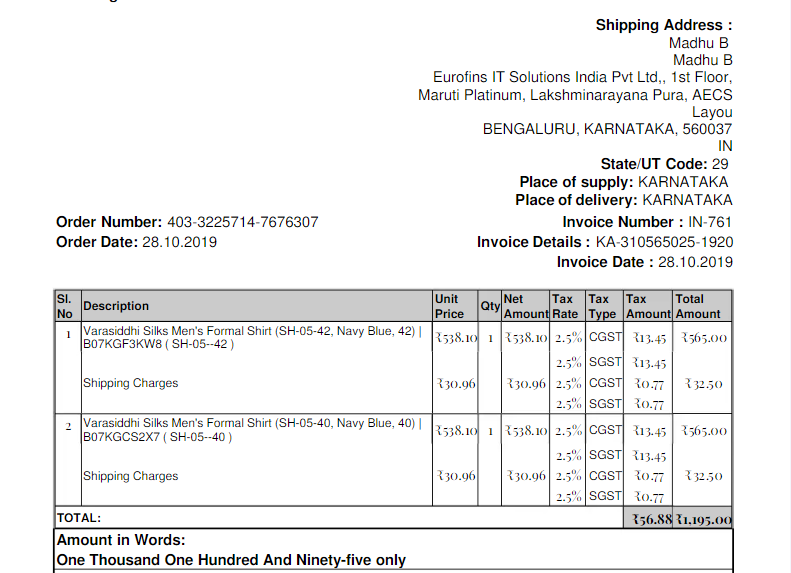

In [21]:
image_loc = "/content/123.png"

In [22]:
question_prompt = "What is the total amount in the invoice? also amount in words"

In [23]:
generate_gemini_response(input_prompt, image_loc, question_prompt)

' Total amount is INR 1195.00\nAmount in words is One Thousand One Hundred Ninety Five only'

In [24]:
question_prompt = "What is the total shipping Charges in the invoice? also amount in words"

generate_gemini_response(input_prompt, image_loc, question_prompt)

' Total Shipping Charges is 64.50\nAmount in Words is Sixty Four and Fifty Paise Only'

In [25]:
question_prompt = "What is the total Tax amount in the invoice? also amount in words"

generate_gemini_response(input_prompt, image_loc, question_prompt)

' The total tax amount in the invoice is 195.00.\nThe amount in words is One Thousand Nine Hundred Ninety Five only.'

In [27]:
question_prompt = "What is the order number and date in the invoice? also shipping address"

res = generate_gemini_response(input_prompt, image_loc, question_prompt)

In [28]:
print(res)

 Order number: 403-3225714-7676307
Order date: 28.10.2019
Shipping Address: Madhu B
                        Eurofins IT Solutions India Pvt Ltd, 1st Floor,
                        Maruti Platinum, Lakshminarayana Pura, AECS Layout
                        Bengaluru, Karnataka, 560037


In [31]:
question_prompt = "What are the detail description of items in the invoice?"

res1 = generate_gemini_response(input_prompt, image_loc, question_prompt)
print(res1)

 1. Varasiddhi Silks Men's Formal Shirt (SH-05-42), Navy Blue, 42
2. Varasiddhi Silks Men's Formal Shirt (SH-05-40), Navy Blue, 40


In [32]:
input_prompt = """
               You are an expert in understanding invoices. as well as Handwritten invoices
               You will receive input images as invoices &
               you will have to answer questions based on the input image
               """

In [33]:
image_loc = "/content/132.png"

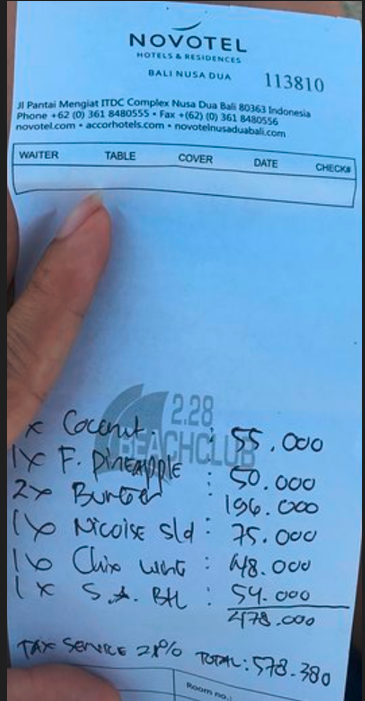

In [34]:
question_prompt = "What is the total amount in the invoice? also how many items in invoice"

res = generate_gemini_response(input_prompt, image_loc, question_prompt)
print(res)

 Total amount is 578380 and there are 6 items in the invoice


In [35]:
question_prompt = "What is the items names and amount in the invoice?"

res = generate_gemini_response(input_prompt, image_loc, question_prompt)
print(res)

 The invoice lists the following items and amounts:

1x Coconut = 55,000
2x F. Pineapple = 50,000
1x Bunter = 196,000
1x Nicoise Sld = 75,000
1x Chio Wit = 48,000
1x S. Sal Bth = 278,000

The total amount of the invoice is 578,380.


In [37]:
578-478

100

In [36]:
question_prompt = "how many service tax in percentage and amount in the invoice?"

res = generate_gemini_response(input_prompt, image_loc, question_prompt)
print(res)

 The service tax is 20% and the amount is 115,760.00.
